In [11]:
import pandas as pd

df = pd.read_csv('OnlineRetail.csv', encoding='ISO-8859-1', on_bad_lines='skip')
print(df.shape)
print(df.info())
print(df.describe())

(541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10

In [1]:
import pandas as pd

df = pd.read_csv('OnlineRetail.csv',
                 encoding='ISO-8859-1',
                 on_bad_lines='skip')

print(df.columns)

Index(['ï»¿InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [2]:
df = pd.read_csv('OnlineRetail.csv',
                 encoding='utf-8-sig',
                 on_bad_lines='skip')
print(df.columns)


Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [3]:
# 1️⃣ Loại bỏ giao dịch bị hủy (InvoiceNo bắt đầu bằng 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# 2️⃣ Loại bỏ các dòng có Quantity hoặc UnitPrice <= 0
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# 3️⃣ Loại bỏ các dòng thiếu CustomerID
df = df.dropna(subset=['CustomerID'])

# 4️⃣ Thay thế mô tả sản phẩm bị thiếu bằng 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

# 5️⃣ Tạo cột doanh thu
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 6️⃣ Chuẩn hóa kiểu dữ liệu
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['CustomerID'] = df['CustomerID'].astype(str)

# 7️⃣ Loại bỏ dòng có ngày lỗi
df = df.dropna(subset=['InvoiceDate'])

# 8️⃣ Reset lại chỉ số dòng
df = df.reset_index(drop=True)

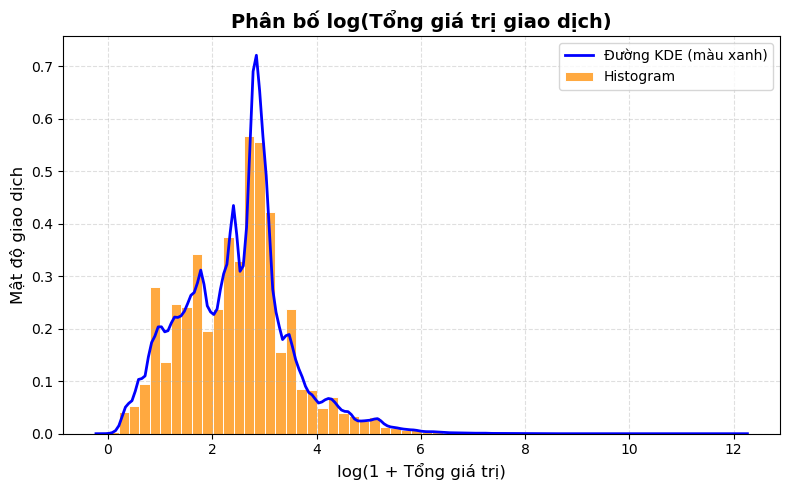

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Bước 1: Tính TotalPrice trước khi lọc
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Bước 2: Lọc và tạo bản sao an toàn
df_clean = df[df['TotalPrice'] > 0].copy()

# Bước 3: Log-transform
df_clean['LogTotalPrice'] = np.log1p(df_clean['TotalPrice'])

# Bước 4: Vẽ biểu đồ
plt.figure(figsize=(8,5))
sns.histplot(df_clean['LogTotalPrice'], bins=60, stat='density', color='darkorange', edgecolor='white')
sns.kdeplot(df_clean['LogTotalPrice'], color='blue', linewidth=2)

plt.title('Phân bố log(Tổng giá trị giao dịch)', fontsize=14, fontweight='bold')
plt.xlabel('log(1 + Tổng giá trị)', fontsize=12)
plt.ylabel('Mật độ giao dịch', fontsize=12)
plt.legend(['Đường KDE (màu xanh)', 'Histogram'], loc='upper right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("12.png", dpi=300)
plt.show()

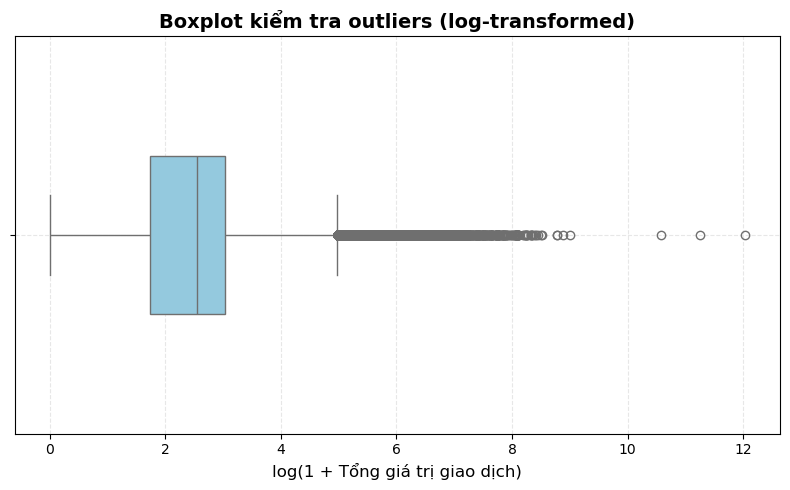

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Log-transform để giảm độ lệch phải
df['LogTotalPrice'] = np.log1p(df['TotalPrice'])  # log(1 + x)

plt.figure(figsize=(8,5))
sns.boxplot(x=df['LogTotalPrice'], color='skyblue', width=0.4)

# Tùy chỉnh tiêu đề và trục
plt.title('Boxplot kiểm tra outliers (log-transformed)', fontsize=14, fontweight='bold')
plt.xlabel('log(1 + Tổng giá trị giao dịch)', fontsize=12)

# Thêm lưới và định dạng trục
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.savefig("13.png", dpi=300)
plt.show()

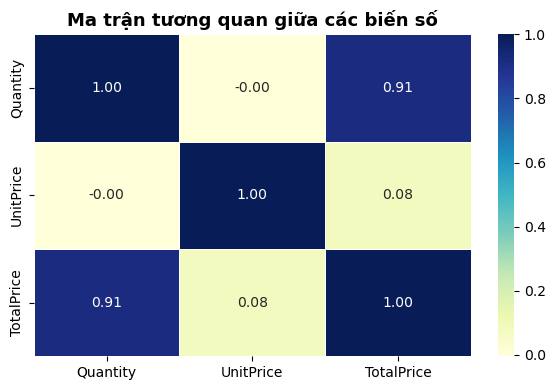

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo cột TotalPrice nếu chưa có
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Chọn các cột số để phân tích
numeric_cols = ['Quantity', 'UnitPrice', 'TotalPrice']

# Tính ma trận tương quan
corr_matrix = df[numeric_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)

plt.title('Ma trận tương quan giữa các biến số', fontsize=13, fontweight='bold')
plt.tight_layout()
plt.savefig("14.png", dpi=300)
plt.show()

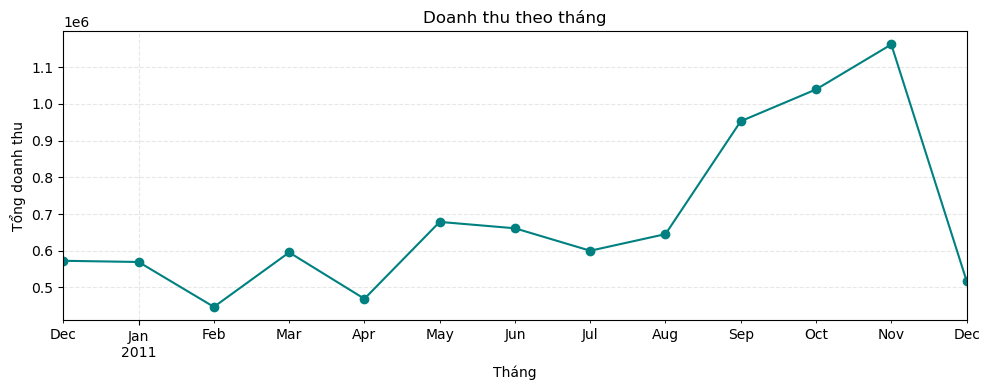

In [15]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('Month')['TotalPrice'].sum()

plt.figure(figsize=(10,4))
monthly_sales.plot(kind='line', marker='o', color='teal')
plt.title('Doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Tổng doanh thu')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("15.png", dpi=300)
plt.show()

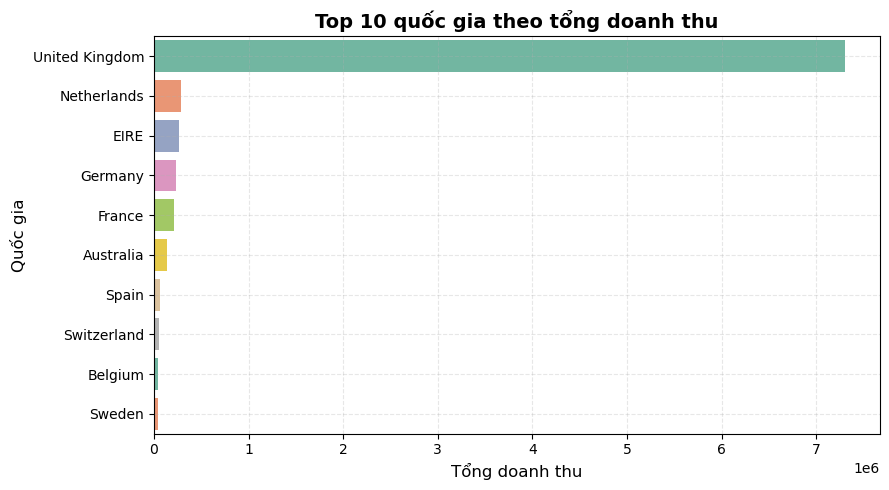

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo DataFrame tạm
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)
country_df = country_sales.reset_index()
country_df.columns = ['Country', 'TotalPrice']

plt.figure(figsize=(9,5))
sns.barplot(data=country_df, x='TotalPrice', y='Country',
            hue='Country', palette='Set2', dodge=False, legend=False)

# Tùy chỉnh tiêu đề và trục
plt.title('Top 10 quốc gia theo tổng doanh thu', fontsize=14, fontweight='bold')
plt.xlabel('Tổng doanh thu', fontsize=12)
plt.ylabel('Quốc gia', fontsize=12)

# Lưới và định dạng
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("16.png", dpi=300)
plt.show()

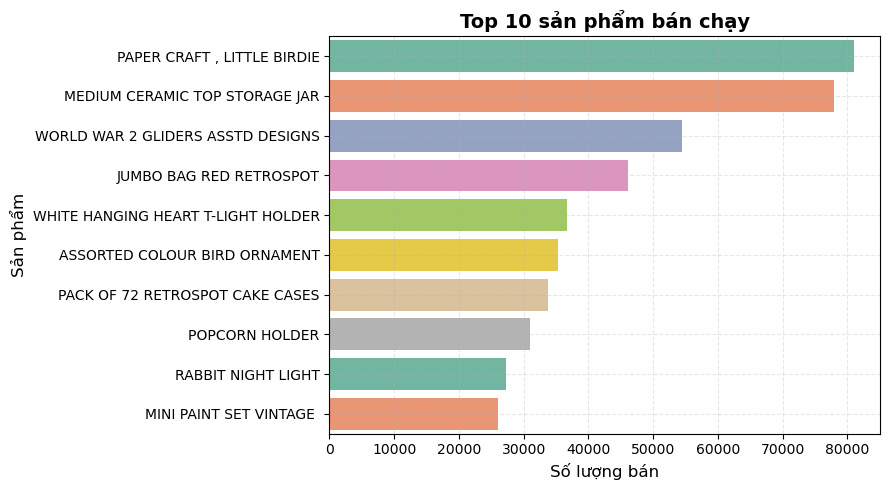

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo DataFrame tạm để vẽ
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
product_df = top_products.reset_index()
product_df.columns = ['Description', 'Quantity']

plt.figure(figsize=(9,5))
sns.barplot(data=product_df, x='Quantity', y='Description',
            hue='Description', palette='Set2', dodge=False, legend=False)

# Tùy chỉnh tiêu đề và trục
plt.title('Top 10 sản phẩm bán chạy', fontsize=14, fontweight='bold')
plt.xlabel('Số lượng bán', fontsize=12)
plt.ylabel('Sản phẩm', fontsize=12)

# Lưới và định dạng
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("17.png", dpi=300)
plt.show()

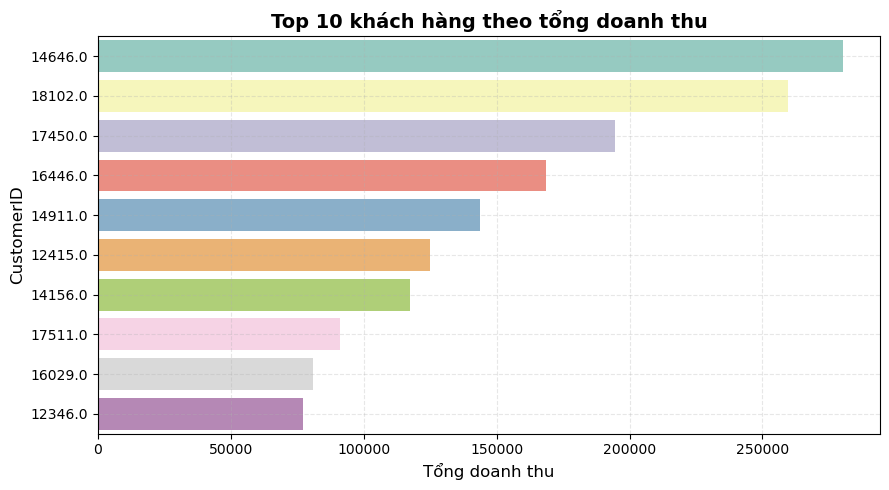

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo DataFrame tạm để vẽ
top_customers = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)
customer_df = top_customers.reset_index()
customer_df.columns = ['CustomerID', 'TotalPrice']
customer_df['CustomerID'] = customer_df['CustomerID'].astype(str)  # để hiển thị rõ trên trục y

plt.figure(figsize=(9,5))
sns.barplot(data=customer_df, x='TotalPrice', y='CustomerID',
            hue='CustomerID', palette='Set3', dodge=False, legend=False)

# Tùy chỉnh tiêu đề và trục
plt.title('Top 10 khách hàng theo tổng doanh thu', fontsize=14, fontweight='bold')
plt.xlabel('Tổng doanh thu', fontsize=12)
plt.ylabel('CustomerID', fontsize=12)

# Lưới và định dạng
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig("18.png", dpi=300)
plt.show()